In [1]:
from sentinel_download.alaska_satellite_facility import ASF
from datetime import datetime, timedelta

In [2]:
# Provide your credentials (nasa earthdata) here in a json file for submitting and downloading jobs via ASF
asf_credentials = "/p/project/hai_wemonitor/S2LS/src/preprocessing/asf_credentials.json"
asf = ASF(asf_credentials)
asf.available_collections()

In [ ]:
# Specifiy some search parameters
satellite = 'SENTINEL1A'
processing_level = 'SLC'
start_date = datetime(year=2018, month=6, day=28) - timedelta(days=10)
end_date = datetime(year=2018, month=6, day=28) + timedelta(days=15)
shapefile_path = "/p/project/hai_wemonitor/S2LS/data/locations/Hiroshima/annotations/Hiroshima.shp"

search_parameters = {
    'satellite': satellite,
    'processingLevel': processing_level,
    #'flightDirection': "descending",
    'start' : start_date,
    'end' : end_date,
    'shapefile': shapefile_path
}

In [5]:
# Use the ASF-API to search the catalog with your parameters
asf_results = asf.search(search_parameters)
if asf_results:
    for result in asf_results:
        print("Processing date: ", result.properties["processingDate"])
        print("File ID: ", result.properties["fileID"] )
        # print("Frame number: ", result.properties["frameNumber"])

All available satellite platforms. Please use the exact names when searching for products.
['AIRSAR', 'ALOS', 'ERS', 'ERS1', 'ERS2', 'JERS', 'RADARSAT', 'SEASAT', 'SENTINEL1', 'SENTINEL1A', 'SENTINEL1B', 'SIRC', 'SMAP', 'UAVSAR']
6 results found.
Processing date:  2018-07-10T21:08:18.000Z
File ID:  S1A_IW_SLC__1SDV_20180710T210818_20180710T210846_022737_0276D8_9F2E-SLC
Processing date:  2018-07-10T09:06:28.000Z
File ID:  S1A_IW_SLC__1SDV_20180710T090628_20180710T090703_022730_02769C_8CDE-SLC
Processing date:  2018-07-10T09:06:00.000Z
File ID:  S1A_IW_SLC__1SDV_20180710T090600_20180710T090630_022730_02769C_4CED-SLC
Processing date:  2018-07-03T21:16:29.000Z
File ID:  S1A_IW_SLC__1SDV_20180703T211629_20180703T211659_022635_0273D6_AD7B-SLC
Processing date:  2018-06-28T21:08:18.000Z
File ID:  S1A_IW_SLC__1SDV_20180628T210818_20180628T210845_022562_0271AB_CB0A-SLC
Processing date:  2018-06-21T21:16:29.000Z
File ID:  S1A_IW_SLC__1SDV_20180621T211629_20180621T211659_022460_026EBC_08ED-SLC


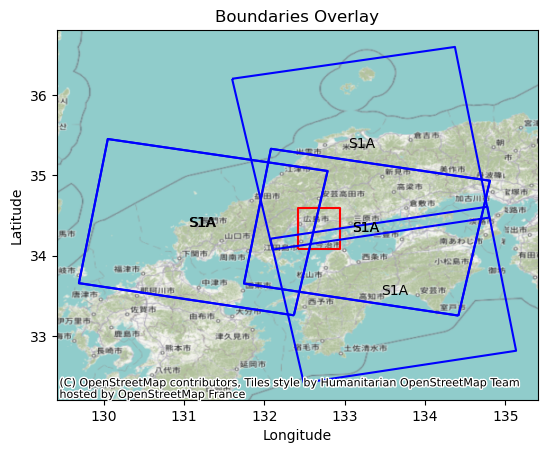

<Figure size 640x480 with 0 Axes>

In [6]:
# Get an overview about the extent od the available tiles for your area of interest
asf.plot_results(shapefile=shapefile_path)

In [8]:
# Generate Sentinel-1 RTC products from the SLC data - this might take a while ~1-2h per job (tile) 
# Modify the search result, e.g. remove items by using the class variable asf.search_results = asf.search_results[:2]
job_name = "rtc_jobs"
# rtc_jobs = asf.start_rtc_jobs(job_name=job_name) 

Current status of jobs:
6 HyP3 Jobs: 6 succeeded, 0 failed, 0 running, 0 pending.


In [ ]:
# Use asf.list_jobs() to the the current status of your jobs.
print("Current status of jobs:")
asf.list_jobs(job_name)

In [ ]:
# Download the succeeded jobs
# downloaded_files = asf.download_jobs(job_name="rtc_jobs")